# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [19]:
import pandas as pd 

In [ ]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nazhm\AppData\Local\Temp\ipykernel_28684\3190195622.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv ("..\dataset\prices.csv",  sep=';')


# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

In [20]:
# 1. Načtení dat
data = pd.read_csv("../dataset/prices.csv", sep=';')
print(data.head())

        Size       Price
0   51.00000   901.18810
1   70.36735   972.23867
2   89.73469  1001.99394
3  109.10204  1024.90830
4  128.46939  1053.72491


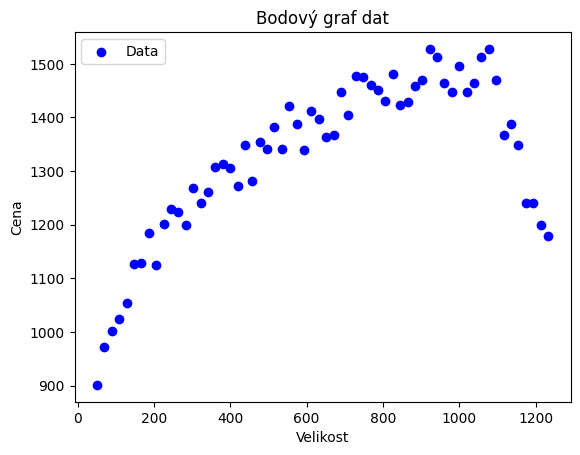

In [21]:
# 2. Prozkoumejte a zobrazte data
plt.scatter(data['Size'], data['Price'], label="Data", color='blue')
plt.xlabel("Velikost")
plt.ylabel("Cena")
plt.title("Bodový graf dat")
plt.legend()
plt.show()

In [ ]:
# 3. Lineární model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Size']])
y = data['Price']

lin_model = LinearRegression()
lin_model.fit(X_scaled, y)


TypeError: LinearRegression.__new__() missing 2 required positional arguments: 'slope' and 'intercept'

# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?